# Week 7 Handin

## 01 Assignment

Data from https://www.dr.dk/

1. Use webscrabing to find out how many headlines contain the word 'corona'.

2. Use regex to make a list of all words that occur just before and just after coronavirus in the article at https://www.dr.dk/nyheder/indland/status-paa-coronavirus-lige-nu. As in "... xxx coronavirus yyy..." find the words xxx and yyy.

3. How many hrefs link to a sub page on dr.dk/nyheder/..., dr.dk/sporten/..., dr.dk/mad/... and dr.dk/musik/... Make a pie chart to show the amount of sports news, food news, music news and regular news.

4. Use Selenium to click into the first news article under "seneste nyt" and print the first parapgraph of the article.

## 02 Status
The first three tasks are done.

## 03 Solution part 1

1. Use webscrabing to find out how many headlines contain the word 'corona'.

In [49]:
import re 
import bs4
import requests

dr = requests.get('https://www.dr.dk/')
dr.raise_for_status()
soup = bs4.BeautifulSoup(dr.text, 'html.parser')

coronatitle1 = soup.select('.dre-title-text')
coronatitle2 = soup.select('.dre-title-text__prefixed')
coronatitle3 = soup.select('.dre-title-text__prefix')
coronatitle4 = soup.select('.dre-title-text__prefixed > .dre-title-text__hyphen')

corona = re.compile(r'corona')

found = len(corona.findall(str(coronatitle1))) + len(corona.findall(str(coronatitle2))) + len(corona.findall(str(coronatitle3))) + len(corona.findall(str(coronatitle4)))
print("Number of headlines containing the word 'corona' is:", found)

Number of headlines containing the word 'corona' is: 10


2. Use regex to make a list of all words that occur just before and just after coronavirus in the article at https://www.dr.dk/nyheder/indland/status-paa-coronavirus-lige-nu. As in "... xxx coronavirus yyy..." find the words xxx and yyy.

In [57]:
dr = requests.get('https://www.dr.dk/nyheder/indland/status-paa-coronavirus-lige-nu')
dr.raise_for_status()
soup = bs4.BeautifulSoup(dr.text, 'html.parser')

virus = re.compile(r'(\w+) coronavirus (\w+)')

allviruses = virus.findall(soup.text)

print("List of words accuring before and after the word 'coronavirus': \n", allviruses)

List of words accuring before and after the word 'coronavirus': 
 [('på', 'lige'), ('på', 'lige'), ('om', 'i'), ('på', 'i'), ('mod', 'og')]


3. How many hrefs link to a sub page on dr.dk/nyheder/..., dr.dk/sporten/..., dr.dk/mad/... and dr.dk/musik/... Make a pie chart to show the amount of sports news, food news, music news and regular news.

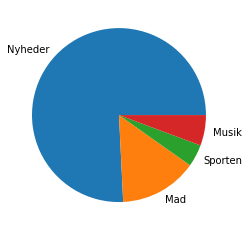

In [77]:
import matplotlib.pyplot as plt
import numpy as np

dr = requests.get('https://www.dr.dk/')
dr.raise_for_status()
soup = bs4.BeautifulSoup(dr.text, 'html')

drnyheder = re.compile(r'dr.dk/nyheder/')
drsporten = re.compile(r'dr.dk/sporten/')
drmad = re.compile(r'dr.dk/mad/')
drmusik = re.compile(r'dr.dk/musik/')

nyheder = len(drnyheder.findall(dr.text))
sporten = len(drsporten.findall(dr.text))
mad = len(drmad.findall(dr.text))
musik = len(drmusik.findall(dr.text))

#print(nyheder, sporten, mad, musik)
drlabels = ['Nyheder', 'Mad', 'Sporten', 'Musik'] 
data = [nyheder, sporten, mad, musik] 
 
#fig = plt.figure()
plt.pie(data, labels = drlabels)  
plt.show() 

4. Use Selenium to click into the first news article under "seneste nyt" and print the first parapgraph of the article.